In [2]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [3]:
dataPath = os.path.join('Data', 'FisherIris.csv')
# Dump data file into an array
with open(dataPath, "r") as ins:
    listArray = [line.replace('\n', '').split('\t') for line in ins]
    
attributeNames = []

# Encode data in desired format
n = len(listArray) - 1
p = len(listArray[0][0].split(',')) - 1
X = np.zeros((n, p))
y = np.zeros(n).astype(int)
for i, data in enumerate(listArray):
    dataTemp = data[0].split(',')
    if i == 0: # first row is attribute names
        attributeNames = dataTemp[0:4]
    else:
        X[i - 1,:] = dataTemp[0:4]
        flowerInd = dataTemp[4]
        if flowerInd == 'Setosa':
            y[i-1] = 0
        elif flowerInd == "Versicolor":
            y[i-1] = 1
        else:
            y[i-1] = 2

> Calculate plug-in estimates of $\hat{\pi}_k$, $\hat{\mu}_k$, and $\hat{\Sigma}$

In [111]:
pi = np.zeros(3)
mu = np.zeros((3, p))
S = np.zeros((p,p))

labels, Nk = np.unique(y, return_counts=True)
K = len(labels)

pi = Nk/n
for l in labels:
    mask = y == l
    xl = X[mask,:]
    mu[l] = np.sum(xl/Nk[l], axis=0)

for l in labels:
    mu_l = mu[l,:]
    mask = y == l
    xl = X[mask,:]
    S += (xl-mu_l).T@(xl-mu_l)/(n-K)

print(pi)
print(mu)
print(S)

[0.33333333 0.33333333 0.33333333]
[[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
[[0.26500816 0.09308163 0.16744218 0.03847347]
 [0.09308163 0.11588435 0.0552381  0.03342313]
 [0.16744218 0.0552381  0.18517007 0.0425415 ]
 [0.03847347 0.03342313 0.0425415  0.04201088]]


> Calculate discriminant function $\delta_k$

In [112]:
def produceDiscriminantLine(X, S, mu, pi):
    
    return X @ np.linalg.inv(S) @ mu - 1/2 * mu.T @ np.linalg.inv(S) @ mu + np.log(pi)

# Discriminants
d = np.zeros((3, n))
for i in range(3):
    d[i,:] = produceDiscriminantLine(X, S, mu[i,:], pi[i])

> Predict class belongings for all observations in training data

In [113]:
# Classify according to discriminant
yhat = np.argmax(d, axis=0)

> Calculate the confusion matrix for training data

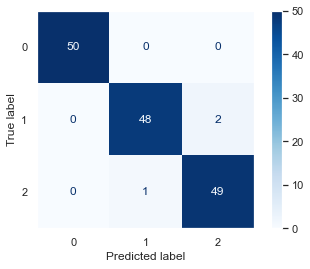

In [114]:
# If you run version 0.22 or higher of sklearn then you can plot the confusion matrix.
# Plot non-normalized confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix(y, yhat, labels=labels), display_labels=labels)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot(include_values=True, cmap='Blues', ax=None)
plt.grid(None)
plt.show()